# Face detection

## Import Packages

In [1]:
from imutils import face_utils
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import dlib
import cv2

import face_recognition

## Function

Colab 또는 Jupyter Notebook에서 이미지를 확인하기 위한 Function입니다.

In [2]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

## Declare a face detector

In [3]:
# face_landmark_path = 'lib/landmark/shape_predictor_68_face_landmarks.dat'
# predictor = dlib.shape_predictor(face_landmark_path)
detector = dlib.get_frontal_face_detector()
predictor = face_recognition.api.pose_predictor_68_point

## Load Image

In [9]:
image_path = 'asset/images/2021_g7.jpg'

In [14]:
image = cv2.imread(image_path)
image = imutils.resize(image, width=1000)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)

## Face detection

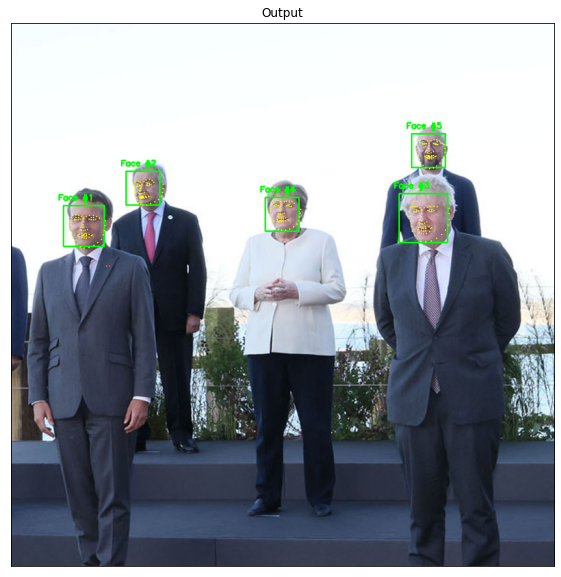

In [15]:
for (i, rect) in enumerate(rects):
    # 얼굴 영역의 얼굴 랜드마크를 결정한 다음 
    # 얼굴 랜드마크(x, y) 좌표를 NumPy Array로 변환합니다.
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
    # dlib의 사각형을 OpenCV bounding box로 변환(x, y, w, h)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # 얼굴 랜드마크에 포인트를 그립니다.
    for (i, (x, y)) in enumerate(shape):
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
        # cv2.putText(image, str(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), 1)
        
plt_imshow("Output", image, figsize=(16,10))

---

정리하여 Function으로 만들어 사용합니다.

In [16]:
def find_face(input_image, size=None, debug=False):
    image = input_image.copy()
    
    if size:
        image = imutils.resize(image, width=size)
        
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray_image, 1)
    
    print('Found {} faces.'.format(len(rects)))
    
    for (i, rect) in enumerate(rects):
        # 얼굴 영역의 얼굴 랜드마크를 결정한 다음 
        # 얼굴 랜드마크(x, y) 좌표를 NumPy Array로 변환합니다.
        shape = predictor(image, rect)
        shape = face_utils.shape_to_np(shape)

        # dlib의 사각형을 OpenCV bounding box로 변환(x, y, w, h)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        if debug:
            # 얼굴 랜드마크에 포인트를 그립니다.
            for (i, (x, y)) in enumerate(shape):
                cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
                # cv2.putText(image, str(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 255, 255), 1)
        
    plt_imshow(["Original", "Find Faces"], [input_image, image], figsize=(16,10))

In [17]:
test_image_path = 'asset/images/people.jpeg'
test_image = cv2.imread(test_image_path)

if test_image is None:
    print('The image does not exist in the path.')
else:
    print('image loading complete.')

image loading complete.


Found 90 faces.


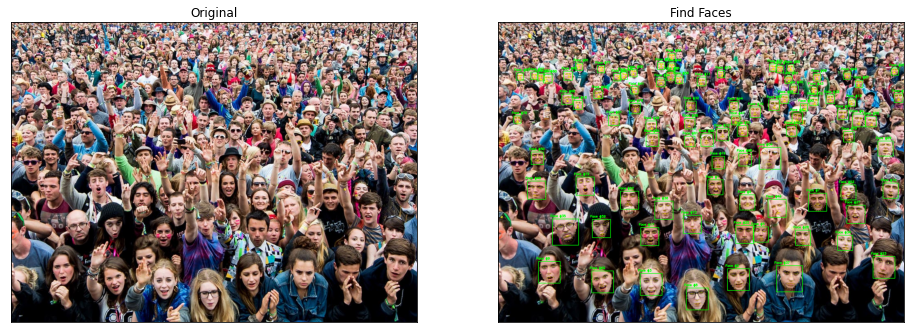

In [18]:
find_face(test_image, size=2000, debug=True)